<a href="https://colab.research.google.com/github/VayneZ1/Celsius-To-Fahrenheit-using-Tenserflow/blob/main/Celsius_To_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf

In [26]:
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [28]:
# Set up training data
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

In [29]:
for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [30]:
# Create the model
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])


In [31]:
# Compile the model, with loss and optimizer functions
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [32]:
# Train the model
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


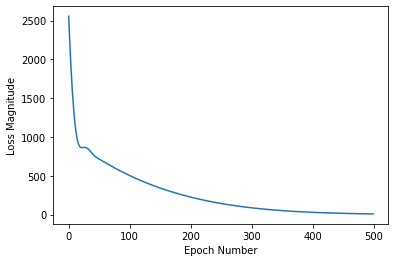

In [33]:
# Display training statistics
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [34]:
# Use the model to predict values
print(model.predict([100.0]))

[[211.32687]]


The correct answer is $100 \times 1.8 + 32 = 212$, so our model is doing really well.

### To review


*   We created a model with a Dense layer
*   We trained it with 3500 examples (7 pairs, over 500 epochs).

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for any Celsius value. (Remember, 100 Celsius was not part of our training data.)


In [35]:
# Looking at the layer weights
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8221341]], dtype=float32), array([29.113459], dtype=float32)]


The first variable is close to ~1.8 and the second to ~32. These values (1.8 and 32) are the actual variables in the real conversion formula.

This is really close to the values in the conversion formula.The internal math looks the same as the equation for a line,  y=mx+b , which has the same form as the conversion equation,  f=1.8c+32 .


In [36]:
# Little Experiment
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74742]]
Model predicts that 100 degrees Celsius is: [[211.74742]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.09171107,  0.13580255, -0.64936954,  0.03898346]],
      dtype=float32), array([-1.7596909, -2.5372481, -3.271845 ,  2.5747883], dtype=float32)]
These are the l1 variables: [array([[ 0.05473292,  0.21104854, -0.48345947,  0.06868646],
       [-0.20844471, -0.13087103, -1.0336003 , -0.64455926],
       [ 0.09191884,  0.79372776, -0.868157  , -1.0488926 ],
       [-0.6267968 , -0.6881413 , -0.25779182,  0.22578172]],
      dtype=float32), array([-1.807522 , -3.209086 ,  2.7974045,  3.1435075], dtype=float32)]
These are the l2 variables: [array([[-0.2068764],
       [-1.4092027],
       [ 0.9214333],
       [ 1.1069899]], dtype=float32), array([3.1552212], dtype=float32)]


As you can see, this model is also able to predict the corresponding Fahrenheit value really well. But when you look at the variables (weights) in the l0 and l1 layers, they are nothing even close to ~1.8 and ~32. The added complexity hides the "simple" form of the conversion equation.